Text(value='AAPL', description='Ticker:', placeholder='Enter ticker symbol (e.g. AAPL)')

Textarea(value='2023-08-03, 1.26\n2023-05-04, 1.52\n2023-02-02, 1.88\n2022-10-27, 1.29\n2022-07-28, 1.20\n2022…

Button(button_style='success', description='Run Analysis', style=ButtonStyle())

Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Entered Earnings Data:


,Earnings Date,EPS
0,2023-08-03,1.26
1,2023-05-04,1.52
2,2023-02-02,1.88
3,2022-10-27,1.29
4,2022-07-28,1.20
5,2022-04-28,1.52
6,2022-01-27,2.10
7,2021-10-28,1.24
8,2021-07-27,1.30
9,2021-04-28,1.40



Calculated Price Changes Around Earnings Dates:


,Earnings Date,Price Change (%),EPS
0,2023-08-03,Ticker AAPL -5.499018 dtype: float64,1.26
1,2023-05-04,Ticker AAPL 3.654819 dtype: float64,1.52
2,2023-02-02,Ticker AAPL 6.236688 dtype: float64,1.88
3,2022-10-27,Ticker AAPL 4.278516 dtype: float64,1.29
4,2022-07-28,Ticker AAPL 3.648187 dtype: float64,1.20
5,2022-04-28,Ticker AAPL 0.689775 dtype: float64,1.52
6,2022-01-27,Ticker AAPL 6.662921 dtype: float64,2.10
7,2021-10-28,Ticker AAPL 0.638204 dtype: float64,1.24
8,2021-07-27,Ticker AAPL -2.691447 dtype: float64,1.30
9,2021-04-28,Ticker AAPL -0.677127 dtype: float64,1.40



Analysis DataFrame (cleaned):


,Earnings Date,Price Change (%),EPS,VIX Level
0,2023-08-03,-5.499018,1.26,15.920000
1,2023-05-04,3.654819,1.52,20.090000
2,2023-02-02,6.236688,1.88,18.730000
3,2022-10-27,4.278516,1.29,27.389999
4,2022-07-28,3.648187,1.20,22.330000
5,2022-04-28,0.689775,1.52,29.990000
6,2022-01-27,6.662921,2.10,30.490000
7,2021-10-28,0.638204,1.24,16.530001
8,2021-07-27,-2.691447,1.30,19.360001
9,2021-04-28,-0.677127,1.40,17.280001



Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Price Change (%)   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     3.207
Date:                Sun, 31 Aug 2025   Prob (F-statistic):              0.103
Time:                        02:52:27   Log-Likelihood:                -24.075
No. Observations:                  10   AIC:                             54.15
Df Residuals:                       7   BIC:                             55.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6703    

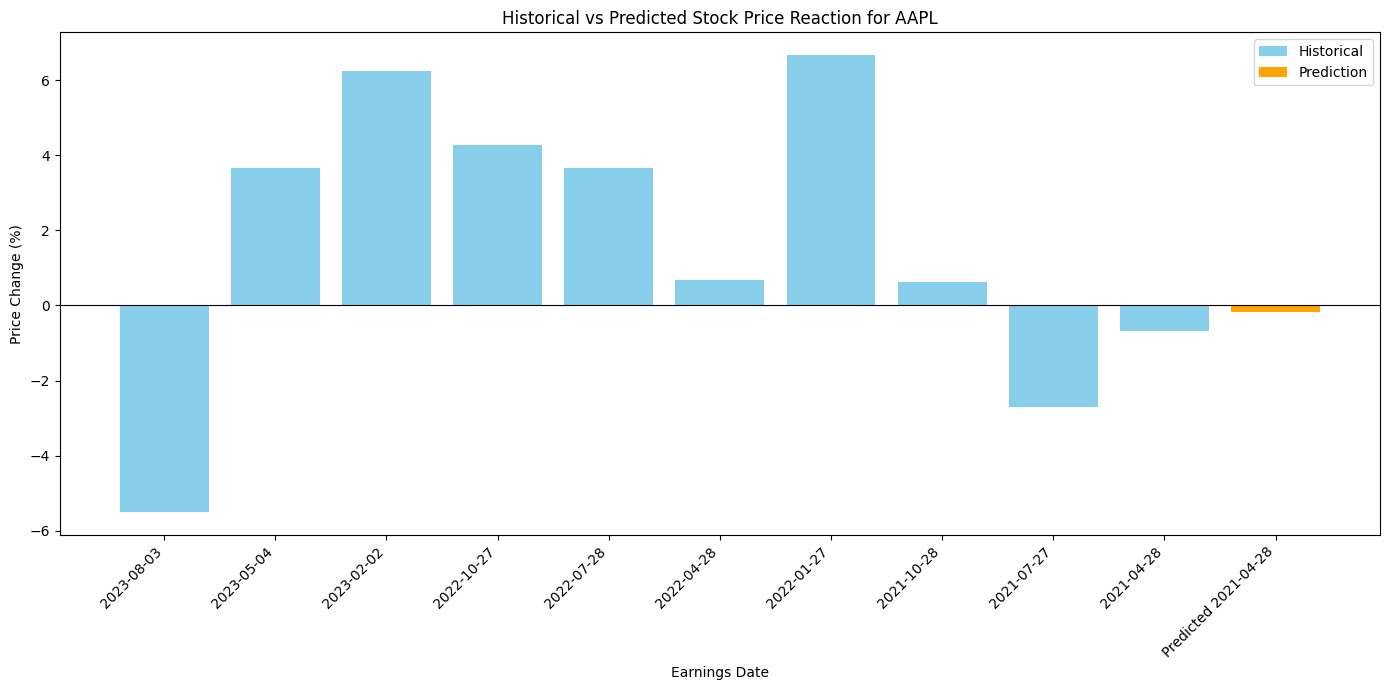

In [6]:
# Install and import necessary libraries
!pip install yfinance
!pip install scipy
!pip install statsmodels
!pip install ipywidgets
!pip install --upgrade nbformat

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import statsmodels.api as sm
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')

# Ticker input
ticker_input = widgets.Text(
    value='AAPL',
    description='Ticker:',
    placeholder='Enter ticker symbol (e.g. AAPL)'
)
display(ticker_input)

# Earnings data input
earnings_data_input = widgets.Textarea(
    value='2023-08-03, 1.26\n2023-05-04, 1.52\n2023-02-02, 1.88\n2022-10-27, 1.29\n2022-07-28, 1.20\n2022-04-28, 1.52\n2022-01-27, 2.10\n2021-10-28, 1.24\n2021-07-27, 1.30\n2021-04-28, 1.40',
    description='Earnings Data:',
    layout=widgets.Layout(width='100%', height='200px')
)
display(earnings_data_input)

# Run button
run_button = widgets.Button(description="Run Analysis", button_style='success')
display(run_button)

def run_analysis_function(b):
    clear_output()
    display(ticker_input, earnings_data_input, run_button)

    ticker = ticker_input.value.strip().upper()
    print(f"Fetching data for {ticker}...")

    stock_data = yf.download(ticker, start='2018-01-01', end=datetime.today().strftime('%Y-%m-%d'))
    vix_data = yf.download('^VIX', start='2018-01-01', end=datetime.today().strftime('%Y-%m-%d'))

    # Parse earnings data
    lines = earnings_data_input.value.strip().split('\n')
    earnings_list = []
    for line in lines:
        date_str, eps_str = line.split(',')
        earnings_list.append({'Earnings Date': pd.to_datetime(date_str.strip()), 'EPS': float(eps_str.strip())})
    earnings_df = pd.DataFrame(earnings_list)

    print("\nEntered Earnings Data:")
    display(earnings_df)

    # Calculate price changes around earnings
    price_changes = []
    for _, row in earnings_df.iterrows():
        date = row['Earnings Date']
        before_date = stock_data[:date - timedelta(days=1)].tail(1).index
        after_date = stock_data[date + timedelta(days=1):].head(1).index
        if len(before_date) > 0 and len(after_date) > 0:
            before_price = stock_data.loc[before_date[0], 'Close']
            after_price = stock_data.loc[after_date[0], 'Close']
            change = ((after_price - before_price) / before_price) * 100
            price_changes.append({'Earnings Date': date, 'Price Change (%)': change, 'EPS': row['EPS']})
    price_changes_df = pd.DataFrame(price_changes)

    print("\nCalculated Price Changes Around Earnings Dates:")
    display(price_changes_df)

    # Add VIX level
    vix_levels = []
    for date in price_changes_df['Earnings Date']:
        vix_before = vix_data.loc[:date]
        vix_close = vix_before['Close'].iloc[-1] if not vix_before.empty else np.nan
        vix_levels.append(vix_close)
    price_changes_df['VIX Level'] = vix_levels

    # Clean + prep dataframe
    analysis_df = price_changes_df.dropna()
    for col in ['EPS', 'Price Change (%)', 'VIX Level']:
        analysis_df[col] = (
            analysis_df[col]
            .astype(str)
            .str.extract(r'([-+]?\d*\.\d+|\d+)')
            .astype(float)
        )

    print("\nAnalysis DataFrame (cleaned):")
    display(analysis_df)

    predicted_change = None
    if len(analysis_df) >= 2:
        X = sm.add_constant(analysis_df[['EPS', 'VIX Level']])
        Y = analysis_df['Price Change (%)']
        model = sm.OLS(Y, X).fit()
        print("\nRegression Model Summary:")
        print(model.summary())

        latest_eps = earnings_df['EPS'].iloc[-1]
        latest_vix = vix_data['Close'].iloc[-1]
        input_data = pd.DataFrame({'const': [1], 'EPS': [latest_eps], 'VIX Level': [latest_vix]})
        predicted_change = float(model.predict(input_data).iloc[0])

        print(f"\nPredicted Price Change After Next Earnings: {predicted_change:.2f}%")
        if predicted_change > 0:
            print("📈 Likely increase. Consider buying before earnings.")
        else:
            print("📉 Likely decrease. Consider holding/selling before earnings.")
    else:
        avg_change = analysis_df['Price Change (%)'].mean()
        predicted_change = float(avg_change) if not pd.isna(avg_change) else 0.0
        print(f"\n⚠️ Not enough data for regression. Using average historical change: {predicted_change:.2f}%")

    # ✅ Combined Historical + Prediction chart (ONLY one kept)
    if predicted_change is not None:
        plt.figure(figsize=(14, 7))
        plt.bar(
            price_changes_df['Earnings Date'].dt.strftime('%Y-%m-%d'),
            price_changes_df['Price Change (%)'].astype(float).values,
            color='skyblue',
            label='Historical'
        )
        next_label = f"Predicted {earnings_df['Earnings Date'].iloc[-1].strftime('%Y-%m-%d')}"
        plt.bar([next_label], [predicted_change], color='orange', label='Prediction')

        plt.axhline(0, color='black', linewidth=0.8)
        plt.xlabel('Earnings Date')
        plt.ylabel('Price Change (%)')
        plt.title(f'Historical vs Predicted Stock Price Reaction for {ticker}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

run_button.on_click(run_analysis_function)
display(run_button)
